## **AtliQ Hotels Data Analysis Project**

### **Getting required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
from google.colab import files

### **Getting files from local computer**

In [ ]:
uploaded = files.upload()

Saving dim_date.csv to dim_date (1).csv
Saving dim_hotels.csv to dim_hotels (1).csv
Saving dim_rooms.csv to dim_rooms (1).csv
Saving fact_aggregated_bookings.csv to fact_aggregated_bookings (1).csv
Saving fact_bookings.csv to fact_bookings (1).csv
Saving new_data_august.csv to new_data_august (1).csv


### **Converting csv into dataframe**

In [ ]:
df_bookings = pd.read_csv('fact_bookings.csv')
df_rooms = pd.read_csv('dim_rooms.csv')
df_hotels = pd.read_csv('dim_hotels.csv')
df_dates = pd.read_csv('dim_date.csv')
df_agg = pd.read_csv('fact_aggregated_bookings.csv')
df_aug  = pd.read_csv('new_data_august.csv')

### **Exploring Bookings data**

In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [2]:
#booking_date ,check_in_date and checkout_date are in object format

In [4]:
# converting bookings dates into datetime format :

In [ ]:
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'] , format='mixed' , dayfirst=True)

df_bookings['checkout_date'] = pd.to_datetime(df_bookings['checkout_date'] , format='mixed' , dayfirst=True)

df_bookings['booking_date'] = pd.to_datetime(df_bookings['booking_date'] , format='mixed' , dayfirst=True)

In [ ]:
df_bookings.dtypes

,0
booking_id,object
property_id,int64
booking_date,datetime64[ns]
check_in_date,datetime64[ns]
checkout_date,datetime64[ns]
no_guests,float64
room_category,object
booking_platform,object
ratings_given,float64
booking_status,object


In [ ]:
df_bookings.describe().round(2)

,property_id,booking_date,check_in_date,checkout_date,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.00,134590,134590,134590,134587.00,56683.00,134590.00,134590.00
mean,18061.11,2022-06-11 05:51:49.871461120,2022-06-14 22:52:29.939816960,2022-06-17 07:51:51.262352640,2.04,3.62,15378.05,12696.12
min,16558.00,2022-04-07 00:00:00,2022-05-01 00:00:00,2022-05-02 00:00:00,-17.00,1.00,6500.00,2600.00
25%,17558.00,2022-05-19 00:00:00,2022-05-23 00:00:00,2022-05-25 00:00:00,1.00,3.00,9900.00,7600.00
50%,17564.00,2022-06-11 00:00:00,2022-06-15 00:00:00,2022-06-17 00:00:00,2.00,4.00,13500.00,11700.00
75%,18563.00,2022-07-04 00:00:00,2022-07-08 00:00:00,2022-07-10 00:00:00,2.00,5.00,18000.00,15300.00
max,19563.00,2022-07-31 00:00:00,2022-07-31 00:00:00,2022-08-06 00:00:00,6.00,5.00,28560000.00,45220.00
std,1093.06,NaN,NaN,NaN,1.03,1.24,93036.04,6928.11


In [ ]:
# guests missing values & negative values
# revenue generated - outliers
# revenue realized - outliers
# ratings - missing values

In [ ]:
# dealing mising values
df_bookings.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,3
room_category,0
booking_platform,0
ratings_given,77907
booking_status,0


In [ ]:
df_bookings = df_bookings[df_bookings['no_guests'] >= 0]

In [ ]:
# In Ratings given column we have too many missing values. hence we cannot remove for fill those values

In [ ]:
# Revenue Generated outlier

In [ ]:
df_bookings.revenue_generated.describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.80,0.90,0.95,0.99]).round(2)

,revenue_generated
count,134578.00
mean,15378.04
std,93040.15
min,6500.00
5%,6500.00
10%,9000.00
25%,9900.00
50%,13500.00
75%,18000.00
80%,19000.00


In [ ]:
# Identifying outliers with 3 std

In [ ]:
upper_limit = df_bookings.revenue_generated.mean() + 3*df_bookings.revenue_generated.std()
lower_limit = df_bookings.revenue_generated.mean() - 3*df_bookings.revenue_generated.std()

In [ ]:
df_bookings[['no_guests', 'revenue_generated', 'revenue_realized' , 'room_category']][df_bookings['revenue_generated'] > upper_limit]

,no_guests,revenue_generated,revenue_realized,room_category
2,2.0,9100000,9100,RT1
111,6.0,28560000,28560,RT3
315,2.0,12600000,12600,RT2
562,2.0,2000000,4420,RT1
129176,2.0,10000000,12600,RT2


In [ ]:
# we can replace the outlier values of revenue generated with those corresponding revenue_realized values

In [ ]:
df_bookings.loc[df_bookings['revenue_generated'] > upper_limit ,
                'revenue_generated'] = df_bookings.loc[df_bookings['revenue_generated']>upper_limit ,
                                                       'revenue_realized']

In [ ]:
df_bookings[df_bookings['revenue_generated'] > upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
df_bookings[df_bookings['revenue_generated'] < lower_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
# Handling outliers in revenue_realized column
upper_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
lower_limit = df_bookings.revenue_realized.mean() - 3*df_bookings.revenue_realized.std()

In [ ]:
df_bookings[df_bookings['revenue_realized'] > upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,2022-04-24,2022-05-01,2022-05-07,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,2022-04-30,2022-05-01,2022-05-03,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,2022-07-31,2022-07-31,2022-08-02,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,2022-07-31,2022-07-31,2022-08-01,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,2022-07-28,2022-07-31,2022-08-01,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,2022-07-25,2022-07-31,2022-08-06,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [ ]:
df_bookings[df_bookings['revenue_realized'] > upper_limit].room_category.value_counts()

,count
room_category,
RT4,1299


In [ ]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
# As we can see all the outliers in revenue_generated column are Presidential Room class category
# We can check the outlier value for revenue_realized outlier specifically in Presidential room category

In [ ]:
outer_limit_rt4 = df_bookings.loc[df_bookings['room_category'] == "RT4" , 'revenue_realized'].mean() + 3*df_bookings.loc[df_bookings['room_category'] == "RT4" , 'revenue_realized'].std()
outer_limit_rt4

np.float64(50585.1056709996)

In [ ]:
df_bookings.revenue_realized.max()

45220

In [ ]:
# we can see that max value of revenue_realized in RT4 room category is within limit
# Hence there is no outlier present.

**Exploring categorical datas**

In [ ]:
cat_cols = df_bookings.select_dtypes(include='object').columns.to_list()
cat_cols

['booking_id', 'room_category', 'booking_platform', 'booking_status']

In [ ]:
cat_cols.remove('booking_id')

,count
room_category,
RT2,49502
RT1,38443
RT3,30562
RT4,16071


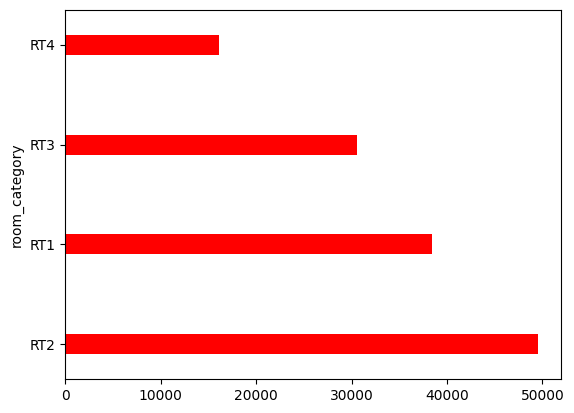

,count
booking_platform,
others,55062
makeyourtrip,26896
logtrip,14754
direct online,13376
tripster,9630
journey,8106
direct offline,6754


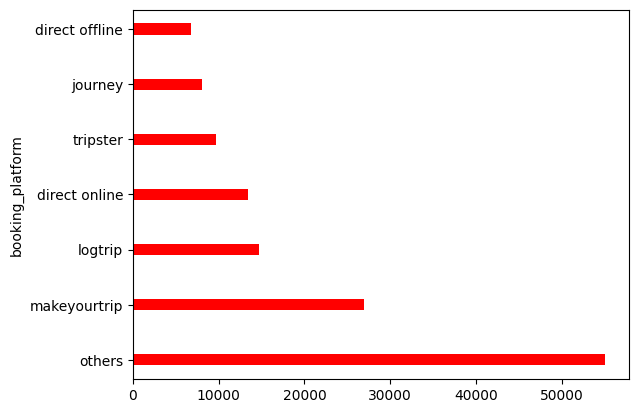

,count
booking_status,
Checked Out,94403
Cancelled,33417
No Show,6758


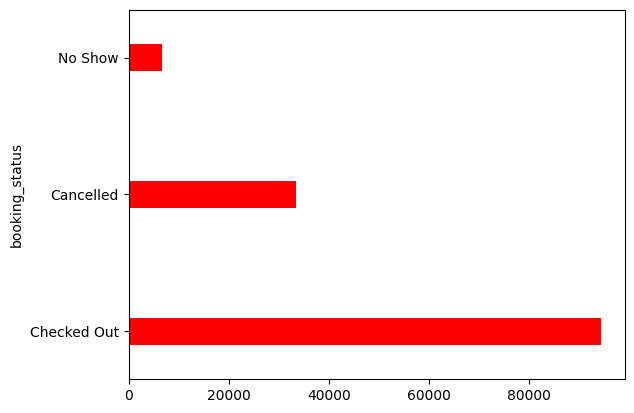

In [ ]:
for i in cat_cols:
  display(df_bookings[i].value_counts())
  print('\n\n')
  df_bookings[i].value_counts().plot(kind = 'barh' , color = 'red' , width = 0.2)
  plt.show()

### **Exploring Other Data frames**

#### **df_date**

In [ ]:
df_dates.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [ ]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [ ]:
# converting date in to date time format

In [ ]:
df_dates['date'] = pd.to_datetime(df_dates.date , format = 'mixed' , dayfirst=True)

In [ ]:
df_dates.dtypes

,0
date,datetime64[ns]
mmm yy,object
week no,object
day_type,object


#### **df_hotels**

In [ ]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [ ]:
cat_cols = df_hotels.select_dtypes(include='object').columns.to_list()
cat_cols

['property_name', 'category', 'city']

In [ ]:
for i in cat_cols:
  display(df_hotels[i].value_counts())
  print('\n\n')
  #df_hotels[i].value_counts().plot(kind = 'barh' , color = 'red' , width = 0.2)
  #plt.show()

,count
property_name,
Atliq Grands,4
Atliq Exotica,4
Atliq City,4
Atliq Blu,4
Atliq Bay,4
Atliq Palace,4
Atliq Seasons,1


,count
category,
Luxury,16
Business,9


,count
city,
Mumbai,8
Hyderabad,6
Bangalore,6
Delhi,5


In [ ]:
# grouping luxury and business hotels

df_hotels.groupby(['category' , 'property_name'])['property_name'].value_counts()

category  property_name
Business  Atliq City       4
          Atliq Palace     4
          Atliq Seasons    1
Luxury    Atliq Bay        4
          Atliq Blu        4
          Atliq Exotica    4
          Atliq Grands     4
Name: count, dtype: int64

#### **df_rooms**

In [ ]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


#### **df_aggregated_bookings**

In [ ]:
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [ ]:
# date format wrong
# bookings > capacity

In [ ]:
# formating date

df_agg['check_in_date'] = pd.to_datetime(df_agg.check_in_date , format = 'mixed' , dayfirst=True)

In [ ]:
# Handling wrong booking values

df_agg[df_agg['successful_bookings'] > df_agg['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,2022-05-01,RT1,30,19.0
12,16563,2022-05-01,RT1,100,41.0
4136,19558,2022-06-11,RT2,50,39.0
6209,19560,2022-07-02,RT1,123,26.0
8522,19559,2022-07-25,RT1,35,24.0
9194,18563,2022-07-31,RT4,20,18.0


In [ ]:
df_agg = df_agg[df_agg['successful_bookings'] <= df_agg['capacity']]

In [ ]:
df_agg[df_agg['successful_bookings'] > df_agg['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9192 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9192 non-null   int64         
 1   check_in_date        9192 non-null   datetime64[ns]
 2   room_category        9192 non-null   object        
 3   successful_bookings  9192 non-null   int64         
 4   capacity             9192 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 430.9+ KB


#### **df_new_data_august**

In [ ]:
df_aug.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [ ]:
# date format
df_aug['check_in_date'] = pd.to_datetime(df_aug.check_in_date , format = 'mixed' , dayfirst=True)

In [ ]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          7 non-null      int64         
 1   property_name        7 non-null      object        
 2   category             7 non-null      object        
 3   city                 7 non-null      object        
 4   room_category        7 non-null      object        
 5   room_class           7 non-null      object        
 6   check_in_date        7 non-null      datetime64[ns]
 7   mmm yy               7 non-null      object        
 8   week no              7 non-null      object        
 9   day_type             7 non-null      object        
 10  successful_bookings  7 non-null      int64         
 11  capacity             7 non-null      int64         
 12  occ%                 7 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64

In [ ]:
df_aug['occ_pct'] = df_aug['occ%']
df_aug.pop('occ%')

,occ%
0,100.00
1,70.00
2,76.67
3,75.00
4,76.92
5,69.23
6,62.50


In [ ]:
df_aug.describe().round(2)

,property_id,check_in_date,successful_bookings,capacity,occ_pct
count,7.0,7,7.00,7.00,7.00
mean,18561.0,2022-08-01 00:00:00,21.71,28.29,75.76
min,16559.0,2022-08-01 00:00:00,10.00,16.00,62.50
25%,17562.5,2022-08-01 00:00:00,19.00,26.00,69.62
50%,19558.0,2022-08-01 00:00:00,21.00,30.00,75.00
75%,19561.0,2022-08-01 00:00:00,26.50,30.00,76.80
max,19563.0,2022-08-01 00:00:00,30.00,40.00,100.00
std,1291.0,NaN,6.99,7.16,11.85


In [ ]:
# checking for invalid_bookings
df_aug[df_aug.successful_bookings > df_aug.capacity]

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ_pct


### **Insights generation**

**1 : What is an average occupancy rate in each of the room categories?**

In [ ]:
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67
4,16558,2022-05-01,RT1,18,19.0,94.74
5,17560,2022-05-01,RT1,28,40.0,70.00


In [ ]:
df_agg['occ_pct'] = df_agg.apply(lambda x : (x['successful_bookings'] / x['capacity']) * 100 , axis =1  ) .round(2)

In [ ]:
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67
4,16558,2022-05-01,RT1,18,19.0,94.74
5,17560,2022-05-01,RT1,28,40.0,70.00


In [ ]:
# avg occ_pct
df_agg.groupby('room_category')['occ_pct'].mean().round(2)

,occ_pct
room_category,
RT1,57.88
RT2,58.01
RT3,58.03
RT4,59.28


In [ ]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
# room_category with name
df = pd.merge(df_agg , df_rooms , left_on = 'room_category' , right_on = 'room_id' , how = 'left')
df.groupby('room_class')['occ_pct'].mean().round(2)

,occ_pct
room_class,
Elite,58.01
Premium,58.03
Presidential,59.28
Standard,57.88


**2 : Average Occupancy rate per city**

In [ ]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_id', 'room_class'],
      dtype='object')

In [ ]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,RT1,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,RT1,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,RT1,Standard
3,16558,2022-05-01,RT1,18,19.0,94.74,RT1,Standard
4,17560,2022-05-01,RT1,28,40.0,70.00,RT1,Standard


In [ ]:
df = pd.merge(df , df_hotels , on = 'property_id')

In [ ]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore
3,16558,2022-05-01,RT1,18,19.0,94.74,RT1,Standard,Atliq Grands,Luxury,Delhi
4,17560,2022-05-01,RT1,28,40.0,70.00,RT1,Standard,Atliq City,Business,Mumbai


In [ ]:
df.groupby('city')['occ_pct'].mean().round(2)

,occ_pct
city,
Bangalore,56.33
Delhi,61.51
Hyderabad,58.12
Mumbai,57.90


**3 : When was the occupancy better? (weekday/weekend)**

In [ ]:
df_dates.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [ ]:
df = pd.merge(df , df_dates , left_on = 'check_in_date' , right_on = 'date')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend
3,16558,2022-05-01,RT1,18,19.0,94.74,RT1,Standard,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,17560,2022-05-01,RT1,28,40.0,70.00,RT1,Standard,Atliq City,Business,Mumbai,2022-05-01,May 22,W 19,weekend


In [ ]:
df.groupby('day_type')['occ_pct'].mean().round(2)

,occ_pct
day_type,
weekeday,51.81
weekend,73.97


**4 : In the month of June what is the occupancy for different cities**

In [ ]:
df.loc[df['mmm yy'] == "Jun 22" , ['occ_pct','city']] .groupby('city')['occ_pct'].mean().round(2).sort_values(ascending = False)

,occ_pct
city,
Delhi,61.46
Mumbai,57.79
Hyderabad,57.69
Bangalore,55.85


**5: We got new data for the month of august. Append that to existing data**

In [ ]:
df_aug.shape

(7, 13)

In [ ]:
df.drop('date' , inplace = True , axis = 1)

In [ ]:
df.drop('room_id' , inplace = True , axis = 1)

In [ ]:
df.shape

(9192, 14)

In [ ]:
df_new = pd.concat([df , df_aug] , ignore_index = True, axis = 0)
df_new.shape

(9199, 13)

In [ ]:
df_new.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
9189,17558,2022-07-31,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend
9190,19563,2022-07-31,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore,Jul 22,W 32,weekend
9191,17561,2022-07-31,RT4,3,4.0,75.00,Presidential,Atliq Blu,Luxury,Mumbai,Jul 22,W 32,weekend
9192,16559,2022-08-01,RT1,30,30.0,100.00,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
9193,19562,2022-08-01,RT1,21,30.0,70.00,Standard,Atliq Bay,Luxury,Bangalore,Aug-22,W 32,weekeday
9194,19563,2022-08-01,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday
9195,19558,2022-08-01,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday
9196,19560,2022-08-01,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday
9197,17561,2022-08-01,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday
9198,17564,2022-08-01,RT1,10,16.0,62.50,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday


**6 : Print revenue realized per city**

In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2.0,RT1,logtrip,5.0,Checked Out,9100,9100
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,2022-04-28,2022-05-01,2022-05-06,2.0,RT1,others,NaN,Cancelled,9100,3640


In [ ]:
df_bookings_updated = pd.merge(df_bookings , df_hotels , on = 'property_id')

In [ ]:
grp = df_bookings_updated.groupby('city')['revenue_realized'].sum()/1000000
grp.rename('revenue_realized_millions' , inplace = True)
grp = grp.round(2)
grp

**7 : Print month by month revenue**

In [ ]:
df_dates.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [ ]:
df_bookings_updated = pd.merge(df_bookings , df_dates , left_on = 'check_in_date' , right_on = 'date')
df_bookings_updated.drop('date' , inplace = True , axis = 1)
df_bookings_updated.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type
0,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend
1,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2.0,RT1,logtrip,5.0,Checked Out,9100,9100,May 22,W 19,weekend
2,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4.0,RT1,direct online,5.0,Checked Out,10920,10920,May 22,W 19,weekend
3,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2.0,RT1,others,4.0,Checked Out,9100,9100,May 22,W 19,weekend
4,May012216558RT17,16558,2022-04-28,2022-05-01,2022-05-06,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend


In [ ]:
month_revenue = df_bookings_updated.groupby('mmm yy')['revenue_realized'].sum()/1000000
month_revenue = month_revenue.round(2)
month_revenue.rename('revenue_realized_millions' , inplace = True)
month_revenue

,revenue_realized_millions
mmm yy,
Jul 22,572.86
Jun 22,553.93
May 22,581.82


**8 : Print revenue realized per hotel type**


In [ ]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
df_bookings_updated = pd.merge(df_bookings_updated , df_hotels , on = 'property_id')

In [ ]:
df_bookings_updated.head()

In [ ]:
hotel_revenue = df_bookings_updated.groupby('property_name')['revenue_realized'].sum()/1000000
hotel_revenue = hotel_revenue.round(2).sort_values(ascending = False)
hotel_revenue.rename('revenue_realized_millions' , inplace = True)
hotel_revenue

,revenue_realized_millions
property_name,
Atliq Exotica,320.29
Atliq Palace,304.08
Atliq City,285.80
Atliq Blu,260.85
Atliq Bay,260.02
Atliq Grands,211.47
Atliq Seasons,66.09


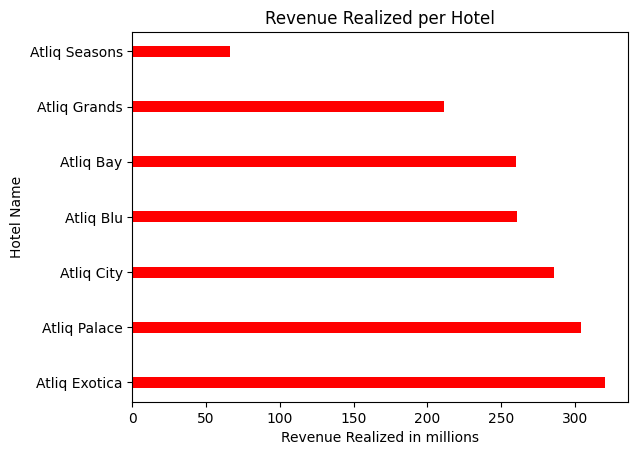

In [ ]:
hotel_revenue.plot(kind='barh' , color = 'red' , width = 0.2)
plt.title('Revenue Realized per Hotel')
plt.xlabel('Revenue Realized in millions')
plt.ylabel('Hotel Name')
plt.show()

**9 : Print average rating per city**


In [ ]:
avg_rating = df_bookings_updated.groupby('city')['ratings_given'].mean().round(2)
avg_rating.rename('avg_rating' , inplace = True)
avg_rating

,avg_rating
city,
Bangalore,3.41
Delhi,3.78
Hyderabad,3.66
Mumbai,3.65


**10 : Print a pie chart of revenue realized per booking platform**


In [ ]:
booking_platform = df_bookings_updated.groupby('booking_platform')['revenue_realized'].sum()/1000000
booking_platform = booking_platform.round(2)
booking_platform.rename('revenue_realized_millions' , inplace = True)
booking_platform

,revenue_realized_millions
booking_platform,
direct offline,86.39
direct online,168.99
journey,102.53
logtrip,187.50
makeyourtrip,340.81
others,699.31
tripster,123.07


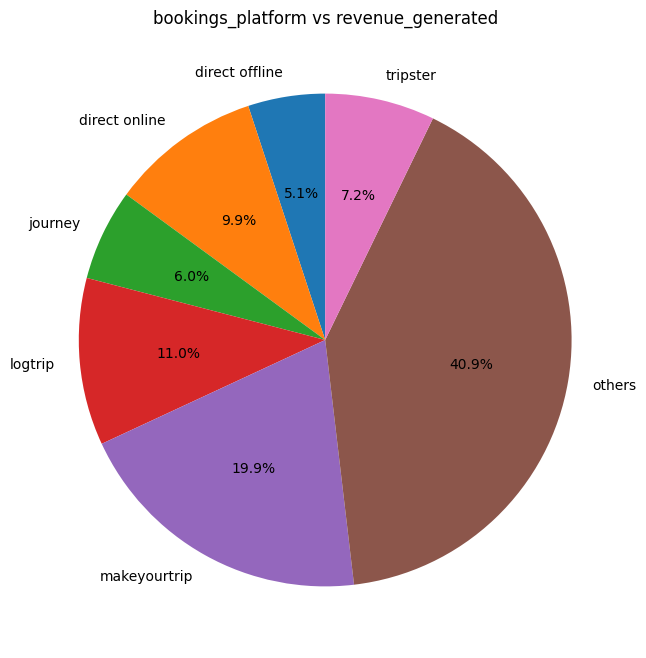

In [ ]:
plt.figure(figsize=(8, 8)) 
sns.color_palette("husl", 8) 
plt.pie(booking_platform.values, labels=booking_platform.index, autopct='%1.1f%%', startangle=90)
plt.title('bookings_platform vs revenue_generated')
plt.show()